## Visualizing Time Series

- Zooming In: zooming in to shorter period within the series can reveal patterns that are hidden when viewing the entire series. This is especially important when the time series is long.

- Another possibility for better capturing the shape of the trend is to add a trend line By trying different trend lines one can see what type of trend (e.g, Linear, Exponential, Cubic) best approximates the data.

- It is often easier to see trends in the data when seasonality is suppressed. Suppressing seasonal patterns can be done by plotting the series at a cruder time scale

- Time series modeling assumes a relationship between an observation and previous observation. Previous observations in a time series are called lags. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

### Time Series - Data Visualization

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd

In [3]:
df = pd.read_csv('/Users/mac/Documents/dataframe1.csv',header=0,parse_dates=[0])

In [4]:
df.head(10)

,DATE,H1
0,2019-11-01,16.0
1,2019-11-02,21.0
2,2019-11-03,17.0
3,2019-11-04,12.0
4,2019-11-05,26.0
5,2019-11-06,24.0
6,2019-11-07,25.0
7,2019-11-08,25.0
8,2019-11-09,0.0
9,2019-11-10,26.0


In [5]:
df_viz = df.copy()

In [6]:
df_viz.head(5)

,DATE,H1
0,2019-11-01,16.0
1,2019-11-02,21.0
2,2019-11-03,17.0
3,2019-11-04,12.0
4,2019-11-05,26.0


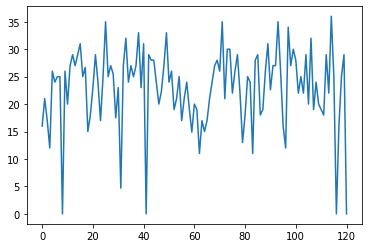

In [7]:
df_viz['H1'].plot()

In [8]:
#change the index value on the x-axis to date time value

df_viz.index = df_viz['DATE']

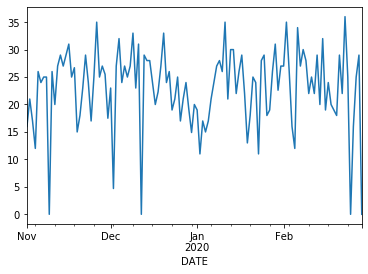

In [9]:
df_viz['H1'].plot()

## Zooming In

In [10]:
df_viz2 = df_viz[(df_viz['DATE'] >= '2019-11-01') & (df_viz['DATE'] <= '2019-11-10')].copy()

In [11]:
df_viz2

,DATE,H1
DATE,,
2019-11-01,2019-11-01,16.0
2019-11-02,2019-11-02,21.0
2019-11-03,2019-11-03,17.0
2019-11-04,2019-11-04,12.0
2019-11-05,2019-11-05,26.0
2019-11-06,2019-11-06,24.0
2019-11-07,2019-11-07,25.0
2019-11-08,2019-11-08,25.0
2019-11-09,2019-11-09,0.0


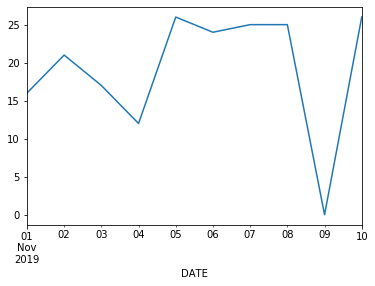

In [12]:
df_viz2['H1'].plot()

### Trendline

In [13]:
import seaborn as sb

### NB

- for a trendline we need numeric data, that is why will need to use the index value on the x-axis

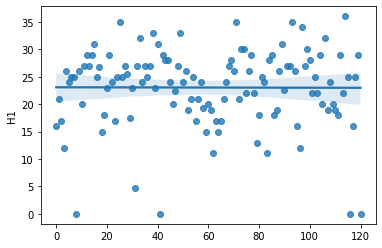

In [17]:
#Plot trendline using regplot

sb.regplot(x=df.index.values, y=df['H1'])

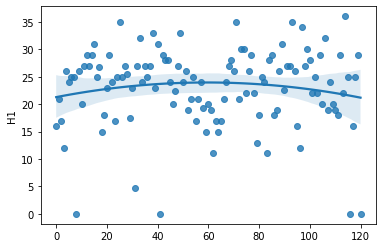

In [20]:
sb.regplot(x=df.index.values, y=df['H1'], order =2)

## Removing Seasonality

In [21]:
df['Year'] = df['DATE'].dt.year

In [22]:
df.head()

,DATE,H1,Year
0,2019-11-01,16.0,2019
1,2019-11-02,21.0,2019
2,2019-11-03,17.0,2019
3,2019-11-04,12.0,2019
4,2019-11-05,26.0,2019


In [23]:
df_new = df.groupby('Year')['H1'].mean()

In [24]:
df_new

Year
2019    23.062295
2020    22.976667
Name: H1, dtype: float64

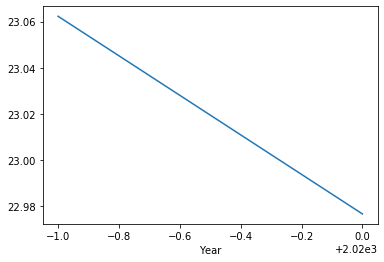

In [25]:
df_new.plot()

### Creating Lag Plots

In [26]:
df['lags'] = df['H1'].shift(1)

In [27]:
df.head()

,DATE,H1,Year,lags
0,2019-11-01,16.0,2019,NaN
1,2019-11-02,21.0,2019,16.0
2,2019-11-03,17.0,2019,21.0
3,2019-11-04,12.0,2019,17.0
4,2019-11-05,26.0,2019,12.0


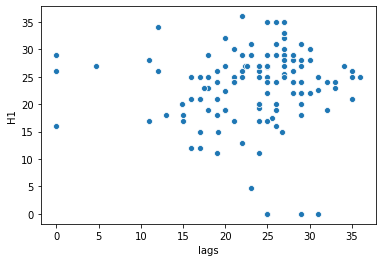

In [28]:
sb.scatterplot(x=df['lags'],y=df['H1'])

In [29]:
from pandas.plotting import lag_plot

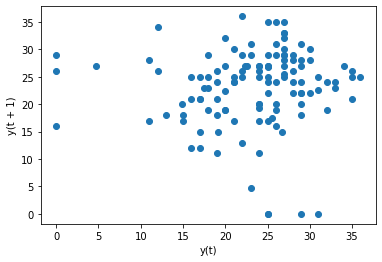

In [30]:
lag_plot(df['H1'])

### Autocorrelation Plots

In [31]:
from pandas.plotting import autocorrelation_plot

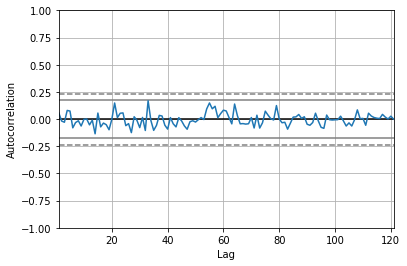

In [32]:
autocorrelation_plot(df['H1'])